In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
import mglearn

# Supervised Machine Learning Algorithms

In [3]:
X, y = mglearn.datasets.make_forge()

/Users/seobokyung/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape: (26, 2)


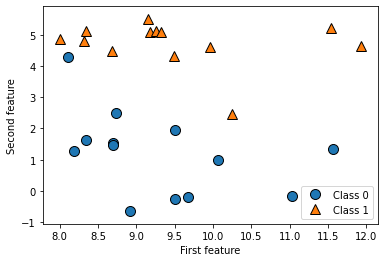

In [4]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(['Class 0','Class 1'])
plt.xlabel('First feature')
plt.ylabel('Second feature')
print('X.shape:', X.shape)

In [5]:
X, y = mglearn.datasets.make_wave(n_samples=40)

Text(0, 0.5, 'Target')

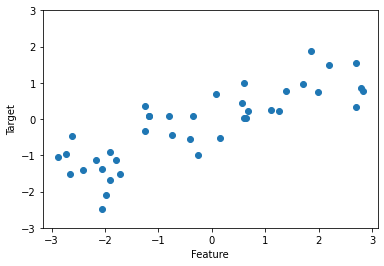

In [6]:
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')

In [7]:
# 유방암 종양의 임상 데이터 위스콘신(Wisconsin Breast Cancer)

from sklearn.datasets import load_breast_cancer

In [8]:
cancer = load_breast_cancer()
print('cancer.keys():', cancer.keys())

cancer.keys(): dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [9]:
print('Shape of cancer data:', cancer.data.shape)

Shape of cancer data: (569, 30)


In [10]:
print('Sample counts per class:\n',
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Sample counts per class:
 {'malignant': 212, 'benign': 357}


### References

- [train_test_split 모듈을 활용하여 학습과 테스트 세트 분리](https://teddylee777.github.io/scikit-learn/train-test-split)
- [구조의 재배열, numpy.reshape 함수](https://yganalyst.github.io/data_handling/memo_5/)
- [내장 함수 zip 사용법](https://www.daleseo.com/python-zip/)
- [bincount](https://nurilee.com/2020/05/10/bincount-%EB%9E%80/)

In [11]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [12]:
print('Feature names:\n', cancer.feature_names)

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [13]:
# 보스턴 주택 가격

from sklearn.datasets import load_boston

In [14]:
boston = load_boston()
print('Data shape:', boston.data.shape)

Data shape: (506, 13)


In [15]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## k-Nearest Neighbors

k-Neighbors classification

/Users/seobokyung/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


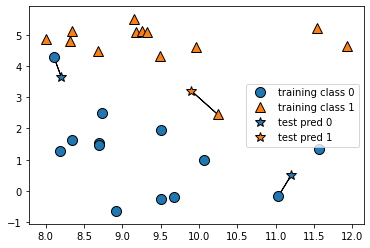

In [16]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/Users/seobokyung/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


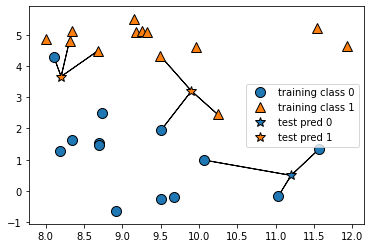

In [17]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [18]:
X, y = mglearn.datasets.make_forge()

/Users/seobokyung/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
clf = KNeighborsClassifier(n_neighbors=3) # hyperparameter

In [23]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
print('Test set predictions:', clf.predict(X_test))

Test set predictions: [1 0 1 0 1 0 0]


In [25]:
print('Test set accuracy:', clf.score(X_test, y_test))

Test set accuracy: 0.8571428571428571


## Analyzing KNeighborsClassifier

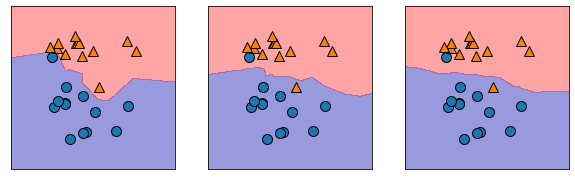

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    
    mglearn.plots.plot_2d_separator(clf, X, fill=True, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)

In [27]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=66)

In [29]:
test = load_breast_cancer()

In [30]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)

In [31]:
for n_neighbors in neighbors_settings:
    print(n_neighbors)
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # record test set accuracy
    test_accuracy.append(clf.score(X_test, y_test))

1
2
3
4
5
6
7
8
9
10


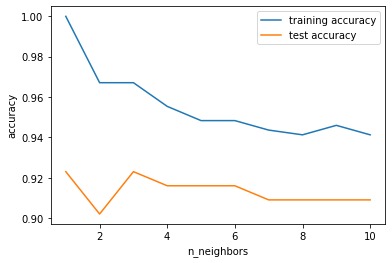

In [32]:
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy') # 주목
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()

## k-neighbors regression

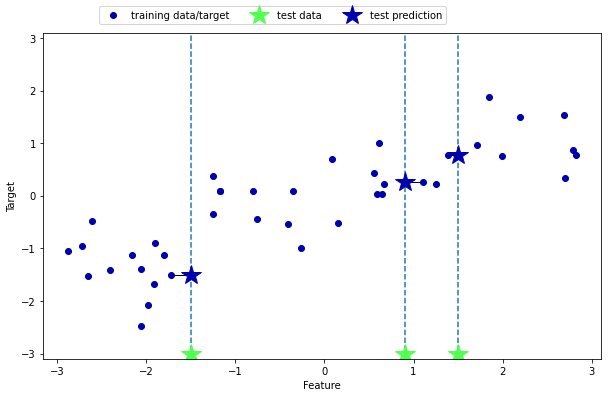

In [33]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

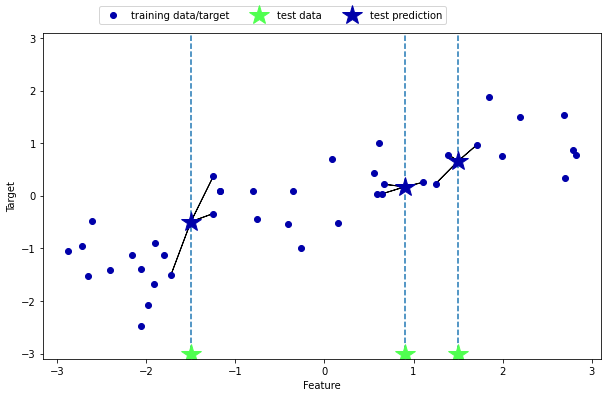

In [34]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [35]:
from sklearn.neighbors import KNeighborsRegressor

In [36]:
X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [37]:
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [38]:
reg.score(X_test, y_test)

0.8344172446249605

In [39]:
X.shape #Reshape: 형태 바꾸기

(40, 1)

[Reshape<br>https://yganalyst.github.io/data_handling/memo_5/](https://yganalyst.github.io/data_handling/memo_5/)

# Analyzing KNeighborsRegressor

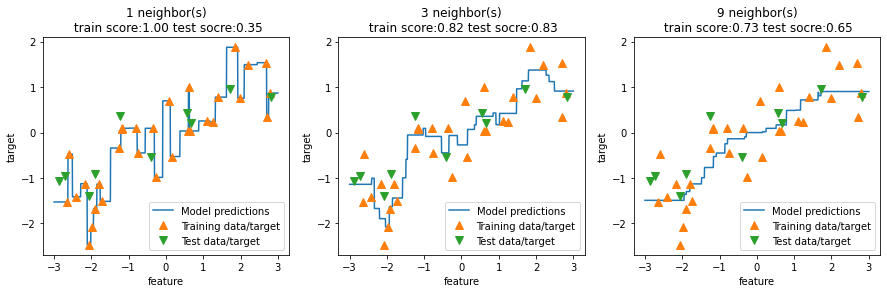

In [40]:
fig, axes = plt.subplots(1,3, figsize=(15,4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    
    ax.plot(X_train, y_train, '^', markersize=8)
    ax.plot(X_test, y_test, 'v', markersize=8)
    
    ax.set_title('{} neighbor(s)\n train score:{:.2f} test socre:{:.2f}'.format(
                n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    
    ax.set_xlabel('feature')
    ax.set_ylabel('target')
    ax.legend(['Model predictions', 'Training data/target', 'Test data/target'])

# Linear Models

w[0]: 0.393906  b: -0.031804


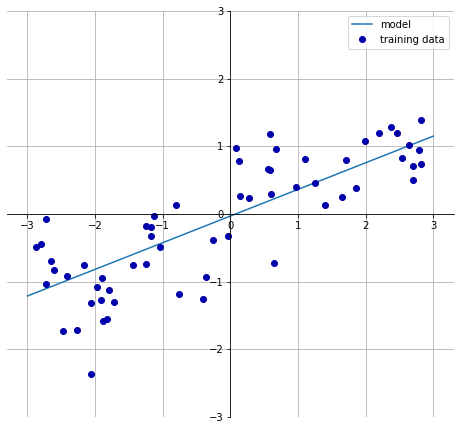

In [41]:
mglearn.plots.plot_linear_regression_wave()

[scikit-learn](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

![scikit-learn](https://scikit-learn.org/stable/_static/ml_map.png)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
X, y = mglearn.datasets.make_wave(n_samples=60)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [45]:
lr = LinearRegression()

In [46]:
lr.fit(X_train, y_train)

LinearRegression()

In [47]:
print('Training set score:', lr.score(X_train, y_train))
print('Test set score:', lr.score(X_test, y_test))

Training set score: 0.6700890315075756
Test set score: 0.65933685968637


In [48]:
X, y = mglearn.datasets.load_extended_boston()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [50]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [51]:
print('Training set score:', lr.score(X_train, y_train))
print('Test set score:', lr.score(X_test, y_test))

Training set score: 0.9520519609032729
Test set score: 0.6074721959665811


#### Ridge regression 리지 회귀
리지 회귀는 과대접합이 되지 않도록 모델을 강제로 제한한다.
linear_model.Ridge에 구현되어 있다.

In [52]:
from sklearn.linear_model import Ridge

In [53]:
ridge = Ridge()

In [54]:
ridge.fit(X_train, y_train)

Ridge()

In [55]:
print('Training set score:', ridge.score(X_train, y_train))
print('Test set score:', ridge.score(X_test, y_test))

Training set score: 0.8857966585170941
Test set score: 0.7527683481744751


In [56]:
ridge10 = Ridge(alpha=10)
ridge10.fit(X_train, y_train)

Ridge(alpha=10)

In [57]:
print('Training set score:', ridge10.score(X_train, y_train))
print('Test set score:', ridge10.score(X_test, y_test))

Training set score: 0.7882787115369615
Test set score: 0.6359411489177311


In [58]:
ridge01 = Ridge(alpha=0.1)
ridge01.fit(X_train, y_train)

Ridge(alpha=0.1)

In [59]:
print('Training set score: {:.2f}'.format(ridge01.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score:0.77


## 데이터의 시각화

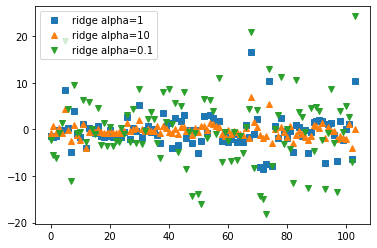

In [60]:
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')
plt.legend(['ridge alpha=1', 'ridge alpha=10', 'ridge alpha=0.1'])

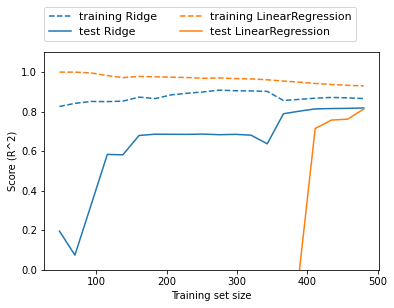

In [61]:
mglearn.plots.plot_ridge_n_samples() # ridge alpha = 1 기준

#### Lasso 라소
라소는 Ridge의 대안으로 제시되며 특정 항목들은 제한이 0이 되면서 특성을 선택할 수 있게 해준다. 이는 모델의 특성을 노출하는데 도움이 된다.

In [62]:
from sklearn.linear_model import Lasso

In [63]:
lasso = Lasso()

In [64]:
lasso.fit(X_train, y_train)

Lasso()

In [65]:
print('Training set score:', lasso.score(X_train, y_train))
print('Test set score:', lasso.score(X_test, y_test))
print('Number of features used:', np.sum(lasso.coef_ != 0))

Training set score: 0.29323768991114596
Test set score: 0.20937503255272272
Number of features used: 4


In [66]:
X.shape

(506, 104)

In [67]:
lasso001 = Lasso(alpha = 0.01, max_iter=10000)

In [68]:
lasso001.fit(X_train, y_train)

Lasso(alpha=0.01, max_iter=10000)

In [69]:
print('Training set score:', lasso001.score(X_train, y_train))
print('Test set score:', lasso001.score(X_test, y_test))
print('Number of features used:', np.sum(lasso001.coef_ != 0))

Training set score: 0.8962226511086497
Test set score: 0.7656571174549983
Number of features used: 33


In [70]:
lasso00001 = Lasso(alpha = 0.0001, max_iter=100000) # 제한 거의 없음
lasso00001.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=100000)

In [71]:
print('Training set score:', lasso00001.score(X_train, y_train)) # 과대적합
print('Test set score:', lasso00001.score(X_test, y_test))
print('Number of features used:', np.sum(lasso00001.coef_ != 0))

Training set score: 0.9507158754515462
Test set score: 0.6437467421273563
Number of features used: 96


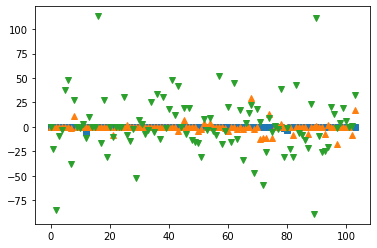

In [72]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')

## Linear models for classification

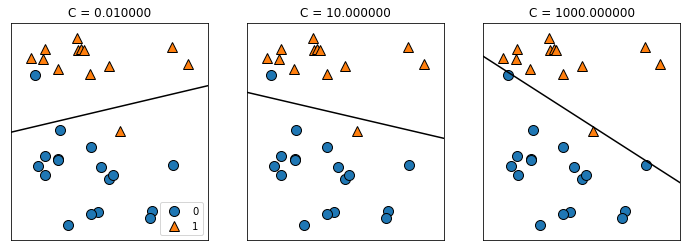

In [73]:
mglearn.plots.plot_linear_svc_regularization()

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC # (SVC(Support Vector Classifier))

In [75]:
X, y = mglearn.datasets.make_forge()

/Users/seobokyung/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


/Users/seobokyung/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


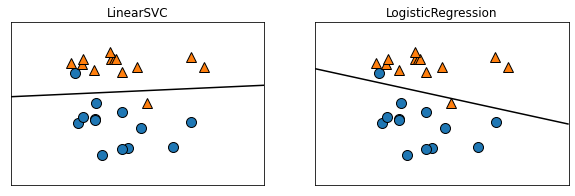

In [76]:
fig, axes = plt.subplots(1,2,figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, ax=ax)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)

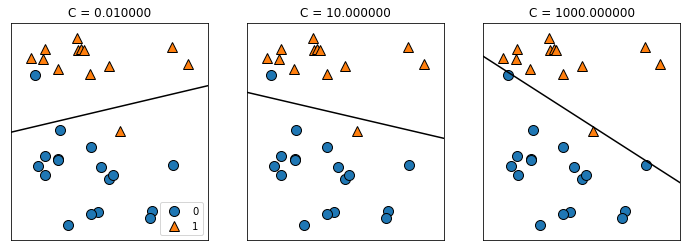

In [77]:
mglearn.plots.plot_linear_svc_regularization()

In [78]:
from sklearn.datasets import load_breast_cancer

In [79]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/seobokyung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
print('Training set score:', logreg.score(X_train, y_train))
print('Test set score:', logreg.score(X_test, y_test))

Training set score: 0.9507042253521126
Test set score: 0.951048951048951


In [81]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

/Users/seobokyung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [82]:
print('Training set score:', logreg100.score(X_train, y_train))
print('Test set score:', logreg100.score(X_test, y_test))

Training set score: 0.9483568075117371
Test set score: 0.958041958041958


In [83]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print('Training set score:', logreg001.score(X_train, y_train))
print('Test set score:', logreg001.score(X_test, y_test))

Training set score: 0.9366197183098591
Test set score: 0.9300699300699301


/Users/seobokyung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


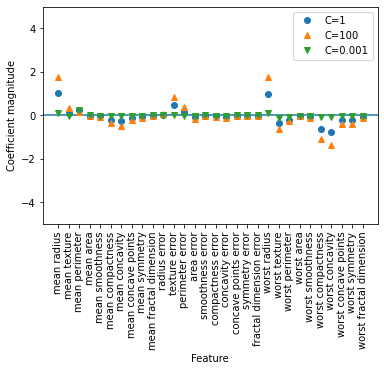

In [84]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

In [85]:
logreg.coef_.T

array([[ 1.02390329],
       [ 0.12515772],
       [ 0.23197906],
       [-0.00695032],
       [-0.04234446],
       [-0.19027314],
       [-0.26611514],
       [-0.11034263],
       [-0.06761595],
       [-0.01425436],
       [ 0.03993523],
       [ 0.48441538],
       [ 0.17579565],
       [-0.08519986],
       [-0.00400346],
       [-0.04217499],
       [-0.05955784],
       [-0.01466378],
       [-0.01673655],
       [-0.00379574],
       [ 1.00895283],
       [-0.33469825],
       [-0.20344691],
       [-0.02144644],
       [-0.07642572],
       [-0.62002753],
       [-0.77444377],
       [-0.22002325],
       [-0.21022613],
       [-0.06135479]])

In [86]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### 제약의 종류
- L1: **Feature에 대한 제약**을 이야기합니다. (Max 반복값이 지정되어야 함) (ex. Lasso Regression)
- L2: **C는 학습량에 대한 제약**을 이야기합니다. (ex. Ridge Regression)

Trainig accuracy of l1 logreg with C=0.001 : 0.91
Test accuracy of l1 logreg with C=0.001 : 0.92
-----------------------------------------------------
Trainig accuracy of l1 logreg with C=1.000 : 0.96
Test accuracy of l1 logreg with C=1.000 : 0.96
-----------------------------------------------------
Trainig accuracy of l1 logreg with C=100.000 : 0.99
Test accuracy of l1 logreg with C=100.000 : 0.98
-----------------------------------------------------


/Users/seobokyung/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


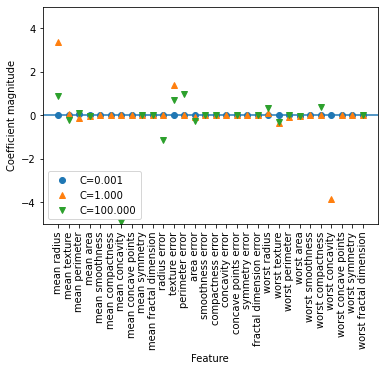

In [98]:
for C, marker in zip([0.001, 1, 100], ['o','^','v']):
    lr_l1 = LogisticRegression(C=C, solver='liblinear', penalty='l1').fit(X_train, y_train)
    
    print('Trainig accuracy of l1 logreg with C={:.3f} : {:.2f}'.format(
    C, lr_l1.score(X_train, y_train)))
    print('Test accuracy of l1 logreg with C={:.3f} : {:.2f}'.format(
    C, lr_l1.score(X_test, y_test)))
    print('-----------------------------------------------------')
    plt.plot(lr_l1.coef_.T, marker, label='C={:.3f}'.format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

[가상데이터 생성 방법](https://datascienceschool.net/03%20machine%20learning/09.02%20%EB%B6%84%EB%A5%98%EC%9A%A9%20%EA%B0%80%EC%83%81%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%83%9D%EC%84%B1.html)

In [99]:
from sklearn.datasets import make_blobs

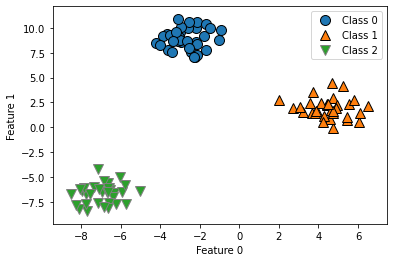

In [100]:
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2'])

In [103]:
linear_svm = LinearSVC().fit(X, y)
print(linear_svm.coef_.shape)
print(linear_svm.intercept_.shape)

(3, 2)
(3,)


In [104]:
linear_svm.coef_

array([[-0.174921  ,  0.23140154],
       [ 0.4762132 , -0.06937605],
       [-0.1891419 , -0.20400469]])

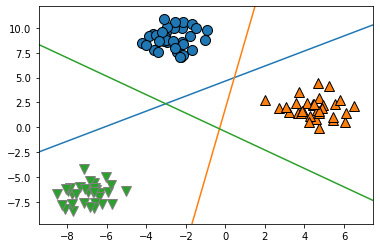

In [108]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept in zip(linear_svm.coef_, linear_svm.intercept_):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1])

Text(0, 0.5, 'Feature 1')

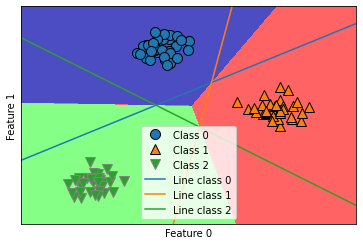

In [112]:
mglearn.plots.plot_2d_classification(linear_svm, X, alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept in zip(linear_svm.coef_, linear_svm.intercept_):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1])
    
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'])
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')